<a href="https://colab.research.google.com/github/Arun-3reddy/Employer-salary-prediction-/blob/main/Employer_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd

In [39]:
pd=pd.read_csv("/content/archive (2).zip")

In [40]:
pd

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [65]:
display(pd.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,mi,ft,data scientist,30400000,CLP,40038,CL,100,cl,l
1,2021,mi,ft,bi data analyst,11000000,HUF,36259,HU,50,us,l
2,2020,mi,ft,data scientist,11000000,HUF,35735,HU,50,hu,l
3,2021,mi,ft,ml engineer,8500000,JPY,77364,JP,50,jp,s
4,2022,se,ft,lead machine learning engineer,7500000,INR,95386,IN,50,in,l


In [64]:
display(pd.info())
display(pd.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 9127 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9127 non-null   int64 
 1   experience_level    9127 non-null   object
 2   employment_type     9127 non-null   object
 3   job_title           9127 non-null   object
 4   salary              9127 non-null   int64 
 5   salary_currency     9127 non-null   object
 6   salary_in_usd       9127 non-null   int64 
 7   employee_residence  9127 non-null   object
 8   remote_ratio        9127 non-null   int64 
 9   company_location    9127 non-null   object
 10  company_size        9127 non-null   object
dtypes: int64(4), object(7)
memory usage: 855.7+ KB


None

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [42]:
num_rows_before = pd.shape[0]
print(f"Number of rows before removing duplicates: {num_rows_before}")

duplicate_rows_count = pd.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

if duplicate_rows_count > 0:
    pd = pd.drop_duplicates()
    num_rows_after = pd.shape[0]
    print(f"Number of rows after removing duplicates: {num_rows_after}")
else:
    print("No duplicate rows found.")

Number of rows before removing duplicates: 14838
Number of duplicate rows: 5711
Number of rows after removing duplicates: 9127


In [43]:
#Standardize data formats
categorical_cols = ['job_title', 'experience_level', 'employment_type', 'company_location', 'company_size']

for col in categorical_cols:
    if pd[col].dtype == 'object':
        pd[col] = pd[col].str.lower()
        print(f"Unique values in '{col}' after standardization:")
        display(pd[col].unique())
    else:
        print(f"Column '{col}' is not of object type, skipping standardization.")


Unique values in 'job_title' after standardization:


/tmp/ipython-input-43-16795443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd[col] = pd[col].str.lower()


array(['data scientist', 'bi data analyst', 'ml engineer',
       'lead machine learning engineer', 'data science manager',
       'head of machine learning', 'research engineer',
       'head of data science', 'ai programmer',
       'machine learning engineer', 'lead data scientist',
       'data engineer', 'applied machine learning scientist',
       'lead data analyst', 'data analytics manager',
       'data integration specialist', 'principal data architect',
       'nlp engineer', 'big data engineer', 'ai research engineer',
       'machine learning software engineer', 'data analyst',
       'applied data scientist', 'ai scientist', 'data analytics lead',
       'business data analyst', 'product data analyst',
       'computer vision engineer', 'data science consultant',
       'ai architect', 'analytics engineer', 'machine learning scientist',
       'research scientist', 'prompt engineer',
       'principal data scientist', 'applied scientist',
       'deep learning engineer', 

Unique values in 'experience_level' after standardization:


array(['mi', 'se', 'en', 'ex'], dtype=object)

Unique values in 'employment_type' after standardization:


array(['ft', 'fl', 'ct', 'pt'], dtype=object)

Unique values in 'company_location' after standardization:


array(['cl', 'us', 'hu', 'jp', 'in', 'id', 'de', 'ch', 'il', 'sg', 'as',
       'no', 'th', 'ph', 'ca', 'mx', 'za', 'hk', 'tr', 'gb', 'qa', 'au',
       'dk', 'es', 'fr', 'eg', 'ua', 'ru', 'pl', 'nz', 'ng', 'pr', 'br',
       'sa', 'ie', 'nl', 'co', 'se', 'ba', 'ae', 'lt', 'pt', 'mu', 'cz',
       'fi', 'ir', 'dz', 'iq', 'cn', 'ar', 'hr', 'si', 'lb', 'at', 'vn',
       'ke', 'gr', 'be', 'mt', 'lv', 'it', 'gi', 'ro', 'ee', 'lu', 'kr',
       'am', 'ad', 'om', 'bs', 'cf', 'pk', 'my', 'gh', 'hn', 'md', 'ec'],
      dtype=object)

Unique values in 'company_size' after standardization:


array(['l', 's', 'm'], dtype=object)

In [44]:
#Clean column names
pd.columns = pd.columns.str.lower().str.replace(' ', '_')
display(pd.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [45]:
#Prepare Data for Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X = pd.drop('salary_in_usd', axis=1)
y = pd['salary_in_usd']

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [48]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [49]:
# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [50]:
# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [51]:
# Fit and transform the training data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

In [52]:
# Transform the testing data
X_test_processed = preprocessing_pipeline.transform(X_test)

print("Data preprocessing complete.")
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

Data preprocessing complete.
Shape of processed training data: (7301, 335)
Shape of processed testing data: (1826, 335)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 27222546515.21129
Root Mean Squared Error (RMSE): 164992.5650300985
R-squared (R2) Score: -3.5187570669376456


## Train and Evaluate a Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train_processed, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regressor Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest Regressor R-squared (R2) Score: {r2_rf}")

Random Forest Regressor Mean Squared Error (MSE): 63119179.41707969
Random Forest Regressor Root Mean Squared Error (RMSE): 7944.7579835435945
Random Forest Regressor R-squared (R2) Score: 0.9895226466821956


In [58]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

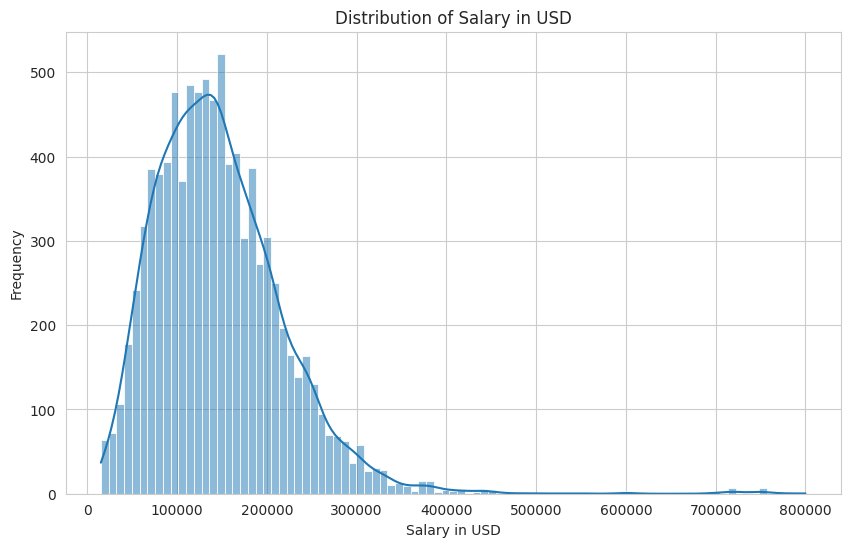

In [59]:
#Distribution of 'salary_in_usd'
plt.figure(figsize=(10, 6))
sns.histplot(pd['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

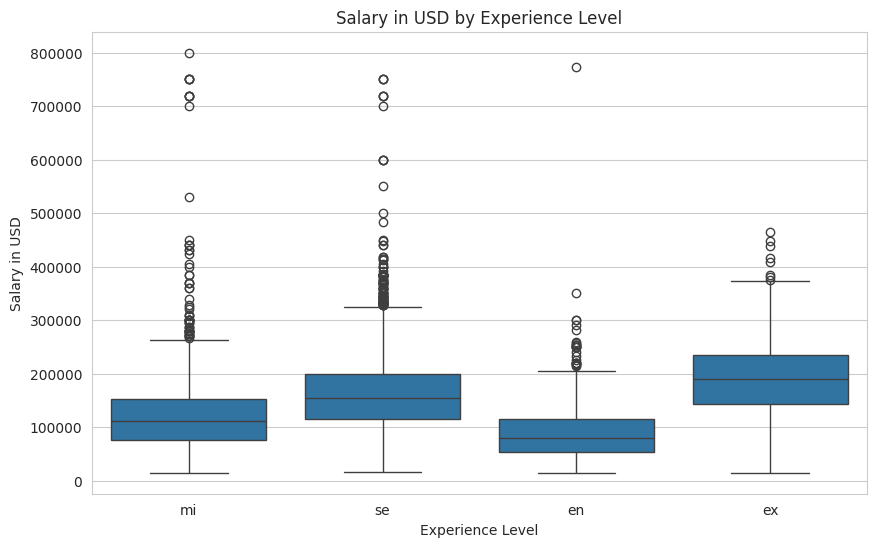

In [60]:
#Relationship between 'experience_level' and 'salary_in_usd'
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=pd)
plt.title('Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

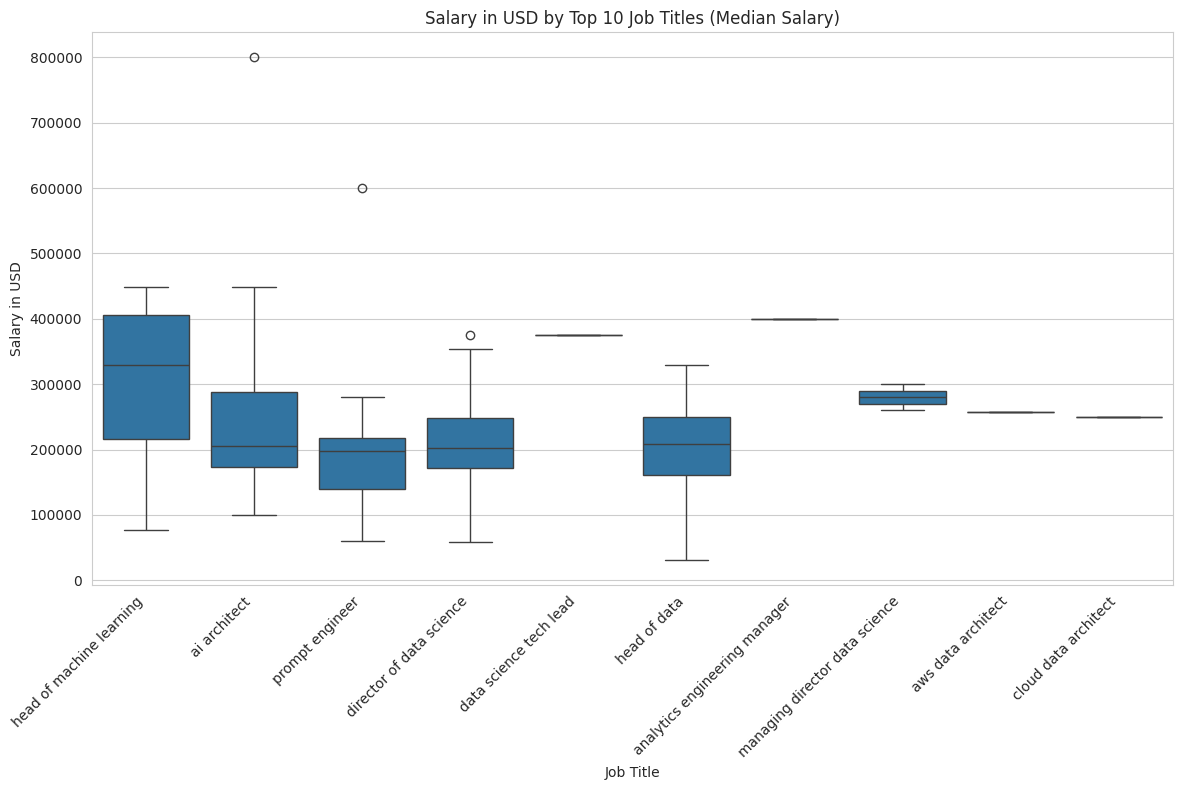

In [61]:
#Relationship between 'job_title' and 'salary_in_usd' (Top 10 job titles)
# Get top 10 job titles by median salary for better readability
top_10_job_titles = pd.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10).index
df_top_jobs = pd[pd['job_title'].isin(top_10_job_titles)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df_top_jobs)
plt.title('Salary in USD by Top 10 Job Titles (Median Salary)')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

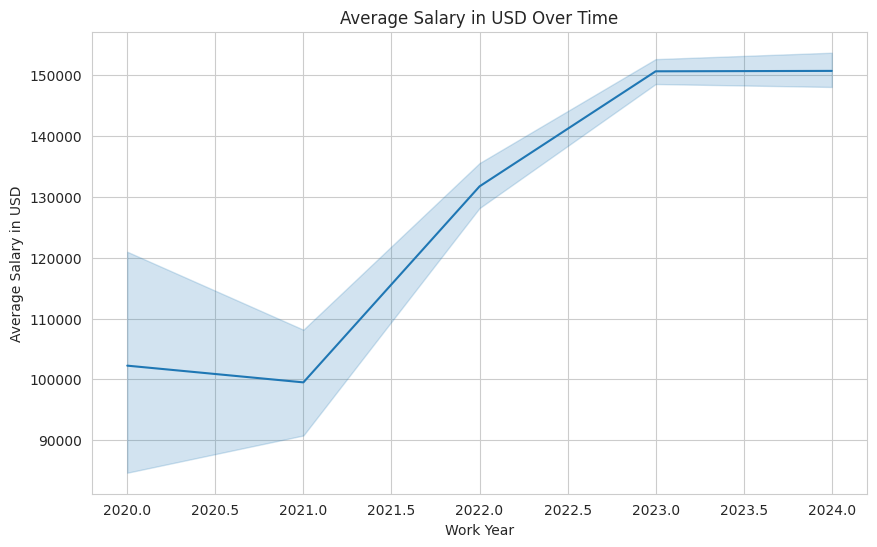

In [62]:
#Salary trends over 'work_year'
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=pd, estimator='mean')
plt.title('Average Salary in USD Over Time')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.show()

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_processed, y_train)
y_pred_dt = dt_model.predict(X_test_processed)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor R-squared (as a percentage): {r2_dt * 100:.2f}%")

Decision Tree Regressor R-squared (as a percentage): 97.63%


In [57]:
#Save the Trained Model and Preprocessor
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_regressor_model.pkl')

# Save the preprocessing pipeline
joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.pkl')

print("Random Forest Regressor model and preprocessing pipeline saved.")

Random Forest Regressor model and preprocessing pipeline saved.
